In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
data = pd.read_csv("911.csv")
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
data.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
lat          663522 non-null float64
lng          663522 non-null float64
desc         663522 non-null object
zip          583323 non-null float64
title        663522 non-null object
timeStamp    663522 non-null object
twp          663229 non-null object
addr         663522 non-null object
e            663522 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [6]:
data.describe()

,lat,lng,zip,e
count,663522.000000,663522.000000,583323.000000,663522.0
mean,40.158162,-75.300105,19236.055791,1.0
std,0.220641,1.672884,298.222637,0.0
min,0.000000,-119.698206,1104.000000,1.0
25%,40.100344,-75.392735,19038.000000,1.0
50%,40.143927,-75.305143,19401.000000,1.0
75%,40.229008,-75.211865,19446.000000,1.0
max,51.335390,87.854975,77316.000000,1.0


#### What are the top 5 zip code ?

In [7]:
data['zip'].nunique()

204

In [8]:
data['zip'].value_counts().head()

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

In [9]:
#### what are the top 5 township call 911?
data['twp'].value_counts().head()

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

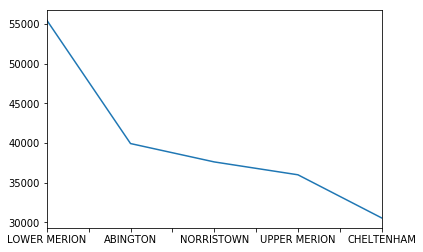

In [12]:
data['twp'].value_counts().head().plot()
plt.show()

In [15]:
data['title'].nunique()

148

In [13]:
data['title'].value_counts().head(5)

Traffic: VEHICLE ACCIDENT -    148372
Traffic: DISABLED VEHICLE -     47909
Fire: FIRE ALARM                38336
EMS: FALL VICTIM                34676
EMS: RESPIRATORY EMERGENCY      34248
Name: title, dtype: int64

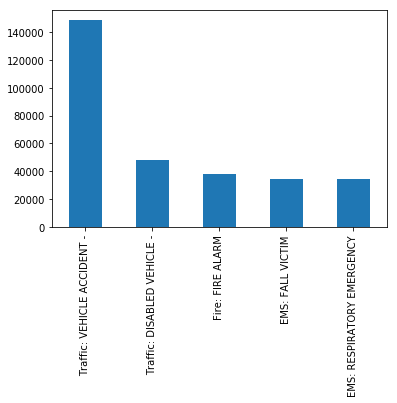

In [18]:
data['title'].value_counts().head(5).plot.bar()
plt.show()

#### what is the most common reason for calling 911?

In [21]:
data['reason'] = data['title'].apply(lambda title : title.split()[0])
data.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS:
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS:


In [20]:
data['reason'].unique()

array(['EMS:', 'Fire:', 'Traffic:'], dtype=object)

In [22]:
data['reason'].value_counts()

EMS:        332692
Traffic:    230208
Fire:       100622
Name: reason, dtype: int64

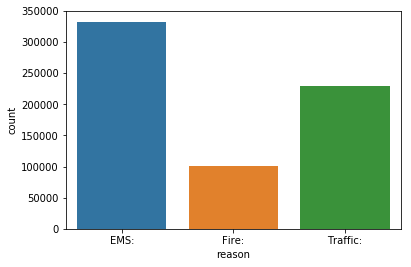

In [23]:
sns.countplot(x = data['reason'],data = data)
plt.show()

#### Conculsion : most of of the call are for EMS that is some kind of injury 

In [31]:
#### to change the type of column to datetime
data['timeStamp'] = pd.to_datetime(data['timeStamp']) 


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 15 columns):
lat          663522 non-null float64
lng          663522 non-null float64
desc         663522 non-null object
zip          583323 non-null float64
title        663522 non-null object
timeStamp    663522 non-null datetime64[ns]
twp          663229 non-null object
addr         663522 non-null object
e            663522 non-null int64
reason       663522 non-null object
Year         663522 non-null int64
Month        663522 non-null int64
Time         663522 non-null object
DayOfWeek    663522 non-null object
Date         663522 non-null object
dtypes: datetime64[ns](1), float64(3), int64(3), object(8)
memory usage: 75.9+ MB


In [33]:
data['Year'] =  pd.DatetimeIndex(data['timeStamp']).year
data['Month'] =  pd.DatetimeIndex(data['timeStamp']).month
data['Time'] =  pd.DatetimeIndex(data['timeStamp']).time
data['DayOfWeek'] =  pd.DatetimeIndex(data['timeStamp']).dayofweek
data['Date'] =  pd.DatetimeIndex(data['timeStamp']).date
data['DayOfWeek'] = data['DayOfWeek'].map({0:'mon',
                                           1:'Tue',
                                           2:'Wed',
                                           3:'Thur',
                                           4:'fri',
                                           5:'sat',
                                           6:'Sun'})


In [34]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Year,Month,Time,DayOfWeek,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS:,2015,12,17:10:52,Thur,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS:,2015,12,17:29:21,Thur,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire:,2015,12,14:39:21,Thur,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS:,2015,12,16:47:36,Thur,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS:,2015,12,16:56:52,Thur,2015-12-10


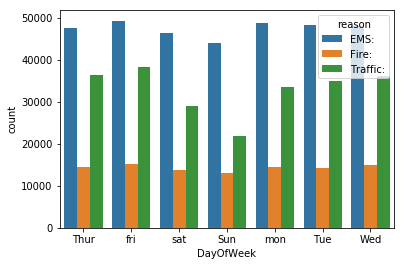

In [36]:
sns.countplot(x = data['DayOfWeek'],data = data ,hue = 'reason')
plt.show()

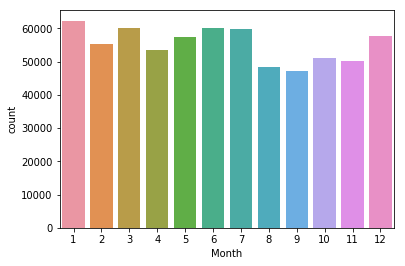

In [37]:
sns.countplot(x = data['Month'],data = data )
plt.show()

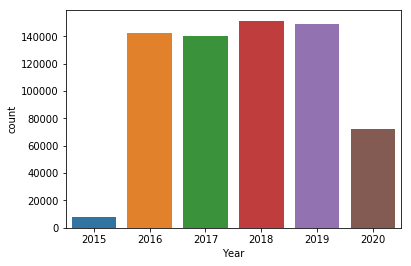

In [38]:
sns.countplot(x = data['Year'],data = data )
plt.show()

#### Conclusion :Maximum calls EMS Emergency call were on friday and max calls were in month of jan and max calls were recieved in Year 2018 